# PROG1319A: Machine Learning II - Regression


## Assigment1: Data preparation

Student: Fidelis Addi

Date: March 16, 2024.


### 1. Table of Contents

- Understanding Business Case

- An overview of the dataset

- Variable Description

- Data Understanding

- Data Cleaning

- Data Visualization

- Preliminary Conclusions and Insights



# Understanding Business Problem

## Background
The ability to predict weather conditions, especially temperature, with high accuracy has significant implications across various sectors. With advancements in machine learning, there's a growing interest in leveraging these technologies to predict weather outcomes based on historical data, offering potentially faster and equally accurate predictions.


## Objectives

The primary goal is to design and implement a regression model that accurately predicts the next-day average temperature in Seoul, South Korea. The successful completion of this project involves:

- Conducting an exploratory data analysis to understand the characteristics and distributions of the dataset.  
- Preprocessing the data to handle missing values, outliers, and to normalize/standardize the features if necessary
- Selecting appropriate machine learning algorithms for regression analysis.
- Training and validating the model using a portion of the dataset and testing its performance on a separate set of data.
- Evaluating the model's accuracy and its ability to generalize to unseen data, using metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), or R-squared (R²).

# Variable Description

After understanding the business case and objectives of the study, we need to know our variables before analyzing them. Thus we have a clear understanding as we go further.

Dataset Variables:
1. Station: Used weather station number.
2. Present_Tmax : Maximum air temperature between 0 and 21 h on the present day (°C).
3. Present_Tmin: Minimum air temperature between 0 and 21 h on the present day (°C).
4. NextDayPred_RHmin: Forecast of next-day minimum relative humidity (%).
5. NextDayPred _RHmax: Forecast of next-day maximum relative humidity (%)
6. NextDayPred _Tmax_lapse: Forecast of next-day maximum air temperature applied lapse rate (°C)
7. NextDayPred _Tmin_lapse: Forecast of next-day minimum air temperature applied lapse rate (°C)
8. NextDayPred _WS: Forecast of next-day average wind speed (m/s)
9. NextDayPred _LH: Forecast of next-day average latent heat flux (W/m2)
10. NextDayPred _CC1: Forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%).
11. NextDayPred _CC2: Forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%).
12. NextDayPred _CC3: Forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%).
13. NextDayPred _CC4: Forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%).
14. NextDayPred _PPT1: Forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%).
15. NextDayPred _PPT2: Forecast of next-day 2nd 6-hour split average precipitation (6-11 h)(%).
16. NextDayPred _PPT3: Forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%).
17. NextDayPred _PPT4: Forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%).
18. Lat: Latitude (°).
19. Lon: Longitude (°).
20. DEM: Elevation (m).
21. Slope: Slope (°).
22. Solar radiation: Daily incoming solar radiation (wh/m2).
23. NextDayAvTemp: The next-day average air temperature (°C)

# Data Understanding

### Preparing the tools
Next, we need to import our data in CSV format to python and necessary libraries.

In [1]:
import pandas as pd                             # data manipulation and analysis 
import matplotlib.pyplot as plt                 # data visualization
import seaborn as sns                           # data visualization
from sklearn.preprocessing import StandardScaler # for zscore standardization
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import f_regression
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## An overview of the dataset.
### Data Exploration (exploratory data analysis or EDA)
The goal here is to find out more about my data and become a subject-matter expert on it.
1. What question am i trying to solve?
2. What kind of data do i have and how do i treat different data types?
3. What's missing from the data and how do i deal with it.
4. Are there any outliers and why should i care about them?
5. How can i add, change or remove features to get the more out of my data?

In [2]:
df =  pd.read_csv('AssignmentI_data.csv')
df.shape # (rows, columns)

(6587, 23)

In [3]:
df.head()

,station,Present_Tmax,Present_Tmin,NextDayPred_RHmin,NextDayPred_RHmax,NextDayPred_Tmax_lapse,NextDayPred_Tmin_lapse,NextDayPred_WS,NextDayPred_LH,NextDayPred_CC1,...,NextDayPred_PPT1,NextDayPred_PPT2,NextDayPred_PPT3,NextDayPred_PPT4,lat,lon,DEM,Slope,Solar radiation,NextDayAvTemp
0,25,30.5,25.2,49.381596,86.834999,31.687821,25.155560,6.723165,22.406308,0.145575,...,0.002227,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.2713,5652.883301,28.85
1,14,28.8,23.0,46.973965,76.080711,32.331097,24.785722,5.599453,12.216014,0.165552,...,0.000000,0.000000,0.000000,0.000000,37.4967,126.927,30.9680,0.6180,5459.974609,29.00
2,12,26.9,21.2,73.001106,93.047508,26.301507,22.668663,8.127174,52.976091,0.572474,...,0.000000,0.371901,0.192265,9.123485,37.5507,126.988,132.1180,0.5931,5918.901367,23.85
3,24,31.8,27.1,67.480995,88.990639,31.027812,26.944326,7.123845,44.529423,0.174482,...,0.000000,0.000000,0.178007,0.000000,37.5237,126.909,17.2956,0.2223,5306.366211,29.10
4,24,24.8,19.9,79.719048,89.949905,21.023026,16.951494,14.510165,85.830552,0.760021,...,0.403947,1.534074,5.315514,0.815112,37.5237,126.909,17.2956,0.2223,4398.263672,18.95


In [4]:
df.tail()

,station,Present_Tmax,Present_Tmin,NextDayPred_RHmin,NextDayPred_RHmax,NextDayPred_Tmax_lapse,NextDayPred_Tmin_lapse,NextDayPred_WS,NextDayPred_LH,NextDayPred_CC1,...,NextDayPred_PPT1,NextDayPred_PPT2,NextDayPred_PPT3,NextDayPred_PPT4,lat,lon,DEM,Slope,Solar radiation,NextDayAvTemp
6582,17,24.7,21.8,53.499859,93.310394,30.789001,21.933232,7.588163,171.251416,0.239633,...,0.000000,0.000000,0.000000,0.0,37.6181,127.099,53.4712,0.6970,5756.279297,26.45
6583,20,31.9,25.7,75.728119,96.866280,27.727631,24.154189,4.958752,53.027428,0.893669,...,1.700342,4.211753,0.330452,0.0,37.6181,127.004,146.5540,4.7296,4854.930664,25.75
6584,24,30.9,21.7,37.068565,76.884262,29.920060,22.716044,5.876675,43.061983,0.035439,...,0.000000,0.000000,0.000000,0.0,37.5237,126.909,17.2956,0.2223,4478.101074,26.70
6585,19,31.1,23.4,53.635799,79.352188,28.804327,23.896702,7.492933,47.301812,0.075245,...,0.000000,0.000000,0.000000,0.0,37.5776,126.938,75.0924,1.7678,5131.667480,25.60
6586,15,31.1,24.0,38.004723,72.211700,35.022643,25.623792,7.162345,33.326221,0.127752,...,0.000000,0.000000,0.000000,0.0,37.5507,126.937,30.0464,0.8552,4843.501953,29.15


In [5]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'NextDayPred_RHmin',
       'NextDayPred_RHmax', 'NextDayPred_Tmax_lapse', 'NextDayPred_Tmin_lapse',
       'NextDayPred_WS', 'NextDayPred_LH', 'NextDayPred_CC1', 'NexDayPred_CC2',
       'NextDayPred_CC3', 'NextDayPred_CC4', 'NextDayPred_PPT1',
       'NextDayPred_PPT2', 'NextDayPred_PPT3', 'NextDayPred_PPT4', 'lat',
       'lon', 'DEM', 'Slope', 'Solar radiation', 'NextDayAvTemp'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6587 entries, 0 to 6586
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   station                 6587 non-null   int64  
 1   Present_Tmax            6525 non-null   float64
 2   Present_Tmin            6525 non-null   float64
 3   NextDayPred_RHmin       6526 non-null   float64
 4   NextDayPred_RHmax       6526 non-null   float64
 5   NextDayPred_Tmax_lapse  6526 non-null   float64
 6   NextDayPred_Tmin_lapse  6526 non-null   float64
 7   NextDayPred_WS          6526 non-null   float64
 8   NextDayPred_LH          6526 non-null   float64
 9   NextDayPred_CC1         6526 non-null   float64
 10  NexDayPred_CC2          6526 non-null   float64
 11  NextDayPred_CC3         6526 non-null   float64
 12  NextDayPred_CC4         6526 non-null   float64
 13  NextDayPred_PPT1        6526 non-null   float64
 14  NextDayPred_PPT2        6526 non-null   


### Description
df.describe() method generates descriptive statistics for us. For numeric data, the result’s index will include count, mean, std, min, max as well as lower, (median) and upper percentiles.

In [7]:
df.describe()

,station,Present_Tmax,Present_Tmin,NextDayPred_RHmin,NextDayPred_RHmax,NextDayPred_Tmax_lapse,NextDayPred_Tmin_lapse,NextDayPred_WS,NextDayPred_LH,NextDayPred_CC1,...,NextDayPred_PPT1,NextDayPred_PPT2,NextDayPred_PPT3,NextDayPred_PPT4,lat,lon,DEM,Slope,Solar radiation,NextDayAvTemp
count,6587.000000,6525.000000,6525.000000,6526.000000,6526.000000,6526.000000,6526.000000,6526.000000,6526.000000,6526.000000,...,6526.000000,6526.000000,6526.000000,6526.000000,6587.000000,6587.000000,6587.000000,6587.000000,6587.000000,6564.000000
mean,12.966601,29.775755,23.227479,56.717764,88.391835,29.625578,23.514338,7.084652,62.798901,0.368441,...,0.582129,0.485704,0.273181,0.261327,37.544671,126.991433,62.184348,1.269537,5339.373485,26.613239
std,7.207929,2.977441,2.410588,14.638596,7.148417,2.949780,2.341485,2.170349,33.835854,0.262529,...,1.913627,1.756001,1.152352,1.174091,0.050570,0.079561,54.643043,1.380793,430.062503,2.523288
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098500,4329.520508,15.900000
25%,7.000000,27.800000,21.700000,45.901576,84.216146,27.689456,22.089766,5.680381,37.576158,0.146529,...,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4992.974853,24.950000
50%,13.000000,29.900000,23.400000,55.072319,89.764530,29.705501,23.768851,6.536892,57.161764,0.315248,...,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5434.702148,26.700000
75%,19.000000,32.000000,24.900000,67.124599,93.755480,31.727259,25.146304,7.990318,84.849629,0.572897,...,0.052447,0.017607,0.008089,0.000041,37.577600,127.042000,59.832400,1.767800,5726.277343,28.450000
max,25.000000,37.600000,29.900000,98.524734,99.999420,38.542255,29.604480,21.857621,213.414006,0.967277,...,23.701544,21.276558,15.841235,16.655469,37.645000,127.135000,212.335000,5.178200,5992.895996,33.150000


# Data Cleaning

In this part of the EDA. We will check ;

    Missing Values
    Duplicated Values

The purpose of data cleaning is to get our data ready to analyze and visualize.

In [8]:
# Are there any missing values?
df.isna().sum()

station                    0
Present_Tmax              62
Present_Tmin              62
NextDayPred_RHmin         61
NextDayPred_RHmax         61
NextDayPred_Tmax_lapse    61
NextDayPred_Tmin_lapse    61
NextDayPred_WS            61
NextDayPred_LH            61
NextDayPred_CC1           61
NexDayPred_CC2            61
NextDayPred_CC3           61
NextDayPred_CC4           61
NextDayPred_PPT1          61
NextDayPred_PPT2          61
NextDayPred_PPT3          61
NextDayPred_PPT4          61
lat                        0
lon                        0
DEM                        0
Slope                      0
Solar radiation            0
NextDayAvTemp             23
dtype: int64

The summary of the missing data analysis indicates that:

- **Present Day Temperature Variables**: `Present_Tmax` and `Present_Tmin` have 62 missing entries each, suggesting that on some days, the maximum and minimum temperatures were not recorded or reported.
- **Next-Day Prediction Variables**: A consistent number of missing values (61) across these variables hints at a possible singular incident affecting data recording.
- **Target Variable (NextDayAvTemp)**: With 23 missing values, its absence poses challenges for model training as it's the variable being predicted. With 23 missing values in your target variable, careful handling is necessary to maintain the integrity of your model's training.
- **Static Variables**: Geographic and environmental factors (`lat`, `lon`, `DEM`, `Slope`, `Solar radiation`) are fully recorded, indicating reliable data capture for these aspects.
- **Data Types**: All variables are either int64 or float64, indicating numerical data. This simplifies processing since there are no categorical variables that require encoding.

In [9]:
#Percentage of missing values per column
missing_percentage = df.isnull().mean() * 100
print("Percentage of missing values for each column:")
print(missing_percentage)

Percentage of missing values for each column:
station                   0.000000
Present_Tmax              0.941248
Present_Tmin              0.941248
NextDayPred_RHmin         0.926066
NextDayPred_RHmax         0.926066
NextDayPred_Tmax_lapse    0.926066
NextDayPred_Tmin_lapse    0.926066
NextDayPred_WS            0.926066
NextDayPred_LH            0.926066
NextDayPred_CC1           0.926066
NexDayPred_CC2            0.926066
NextDayPred_CC3           0.926066
NextDayPred_CC4           0.926066
NextDayPred_PPT1          0.926066
NextDayPred_PPT2          0.926066
NextDayPred_PPT3          0.926066
NextDayPred_PPT4          0.926066
lat                       0.000000
lon                       0.000000
DEM                       0.000000
Slope                     0.000000
Solar radiation           0.000000
NextDayAvTemp             0.349173
dtype: float64


In [10]:
#Calculate the total number of missing values
total_missing = df.isnull().sum().sum()

# Calculate the total number of entries in the dataset
total_entries = df.size

# Calculate the percentage of missing values
missing_percentage = (total_missing / total_entries) * 100

print(f'Total percentage of missing values in the dataset: {missing_percentage}%')


Total percentage of missing values in the dataset: 0.6607217114078455%


# Missing Value Imputation of Target Variable

### Strategies for Target Variable (NextDayAvTemp)
Since NextDayAvTemp is your target variable, care must be taken in handling its missing values as a direct imputation of values for the target could lead to biased predictions. It might be better to exclude rows with missing target variable values from the training dataset, especially since the percentage of missing values is relatively low(0.35%). This ensures that the model learns from complete cases where the target variable is known.

In [11]:
# Handling missing values in target variable by excluding rows
df = df.dropna(subset=['NextDayAvTemp'])

# Dealing with missing Value of Features
For the features, i was initially thinking of imputating via mean but upon exploring my dataset i noticed it has outliers and inputting with the mean will not be a good choice since the mean is drastically affected by the presence of outliers. I thought of inputting with the Nearest neighbors imputation but noticed it calculates the euclidean distance of the values for the imputation but since the data points are not on the same scale i dont think it will be a good option.


 Final decision regrading imputation:
    - since the percentage of missing values is less than 1%(0.66), i decided to drop all missing values as i do not think it will affect the size of my dataset.


In [12]:
df_cleaned = df.dropna()

In [160]:
df_cleaned.to_csv('df_cleaned.csv', index=False)

In [13]:
df_cleaned.shape

(6450, 23)

# Checking for duplicated
This checks for duplicated in my dataset while keeping the first occurrence of it. I use some attributes inside the parenthesis keep = ‘first’ to keep the first row of duplicated ones.


In [14]:
df_cleaned[df_cleaned.duplicated(keep='first')] 

,station,Present_Tmax,Present_Tmin,NextDayPred_RHmin,NextDayPred_RHmax,NextDayPred_Tmax_lapse,NextDayPred_Tmin_lapse,NextDayPred_WS,NextDayPred_LH,NextDayPred_CC1,...,NextDayPred_PPT1,NextDayPred_PPT2,NextDayPred_PPT3,NextDayPred_PPT4,lat,lon,DEM,Slope,Solar radiation,NextDayAvTemp


Luckily, there are no duplicated values in this dataset and can proceed to analyze the data, observe patterns, and identify outliers with the help of visualization methods.


In [15]:
#Changing the categorical column from int to category
df_cleaned.loc[:,'station'] = df_cleaned['station'].astype('category')

In [16]:
df_cleaned.dtypes

station                     int64
Present_Tmax              float64
Present_Tmin              float64
NextDayPred_RHmin         float64
NextDayPred_RHmax         float64
NextDayPred_Tmax_lapse    float64
NextDayPred_Tmin_lapse    float64
NextDayPred_WS            float64
NextDayPred_LH            float64
NextDayPred_CC1           float64
NexDayPred_CC2            float64
NextDayPred_CC3           float64
NextDayPred_CC4           float64
NextDayPred_PPT1          float64
NextDayPred_PPT2          float64
NextDayPred_PPT3          float64
NextDayPred_PPT4          float64
lat                       float64
lon                       float64
DEM                       float64
Slope                     float64
Solar radiation           float64
NextDayAvTemp             float64
dtype: object

# Splitting Features and Target Variable
Ideally, the testing and validation sets should have been split before univariate/bivariate analysis. The training set should be the only set to analyze and visualize in order to avoid any potential look-ahead bias.

In [17]:
X = df_cleaned.iloc[:, :-1] #Drops the last variable(target variable) and keeps the rest of the data.
y = df_cleaned.iloc[:,-1] # Keeps only the target variable.

In [18]:
 #This imports the train_test_split function from the scikit-learn library. This function is widely used to split a dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [19]:
X_train = X_train.dropna(subset=['station'])
X_test = X_test.dropna(subset=['station'])

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5160, 22), (1290, 22), (5160,), (1290,))

# Data transformation
### Standardize/Scaling the numeric variables
The dataset will be standardized using Z-score standardization , excluding the **station variable**, which is categorical.
Here i used the scaler function for a zscore standardization since this method is mostly good when you dont have an idea of the distribution of the dataset.
- For the categorical variable(station) i will be changing the data type from *int64* to *categorical*.

In [21]:
# Selecting all numeric columns except 'station'
numeric_columns = X_train.select_dtypes(include=['int64', 'float64','category']).columns.drop('station')
numeric_columns2 = X_test.select_dtypes(include=['int64', 'float64','category']).columns.drop('station')

# Fitting the scaler to my data (excluding 'station') and transforming it
X_train.loc[:, numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test.loc[:, numeric_columns] = scaler.transform(X_test[numeric_columns2])

# Display the first few rows of the standardized dataset to verify
X_train.head()

,station,Present_Tmax,Present_Tmin,NextDayPred_RHmin,NextDayPred_RHmax,NextDayPred_Tmax_lapse,NextDayPred_Tmin_lapse,NextDayPred_WS,NextDayPred_LH,NextDayPred_CC1,...,NextDayPred_CC4,NextDayPred_PPT1,NextDayPred_PPT2,NextDayPred_PPT3,NextDayPred_PPT4,lat,lon,DEM,Slope,Solar radiation
4545,8,0.987673,2.303871,-0.102108,-0.121406,1.359899,0.854298,-0.526709,0.279843,-1.168056,...,-0.550179,-0.300986,-0.276051,-0.230956,-0.217785,-1.473144,-1.028766,-0.176932,0.201798,-0.193061
896,14,-0.392797,0.421261,1.178945,-0.952594,-0.670766,0.797624,2.586936,-1.362858,0.522610,...,1.205290,-0.298502,-0.276051,-0.211486,-0.213343,-0.940712,-0.813940,-0.570372,-0.476271,0.862945
5327,20,-1.066197,-0.206276,0.082261,1.198637,-1.170240,-0.606361,0.666253,0.373539,-0.944439,...,-0.275329,-0.300986,-0.276051,-0.230956,-0.217785,1.453258,0.159091,1.539889,2.474252,-1.738269
5940,1,-1.638587,-0.373620,2.450847,1.459491,-1.422960,0.101501,1.403346,-1.173233,1.617567,...,1.438731,-0.290320,1.403200,-0.215884,-0.217310,1.187043,-0.005187,2.740857,1.078789,1.396436
1129,17,0.751983,-0.708306,-0.388834,0.879716,0.748728,-0.087151,-1.232779,1.104264,-0.278127,...,1.507930,-0.300986,-0.276051,-0.230956,0.038735,1.453258,1.359585,-0.159529,-0.419579,1.015546


In [22]:
X_test.head()

,station,Present_Tmax,Present_Tmin,NextDayPred_RHmin,NextDayPred_RHmax,NextDayPred_Tmax_lapse,NextDayPred_Tmin_lapse,NextDayPred_WS,NextDayPred_LH,NextDayPred_CC1,...,NextDayPred_CC4,NextDayPred_PPT1,NextDayPred_PPT2,NextDayPred_PPT3,NextDayPred_PPT4,lat,lon,DEM,Slope,Solar radiation
541,9,0.886663,0.965126,1.437348,0.572675,-0.460816,0.669683,1.394139,0.883170,0.294706,...,-0.074925,-0.295022,-0.084024,-0.230956,-0.217785,-0.940712,-2.090255,-0.205902,-0.623739,0.158959
2514,12,-0.561147,-0.540963,0.591801,-0.106111,0.195763,0.822817,0.081473,-1.456353,0.166841,...,0.638596,-0.300986,-0.276051,-0.230956,-0.217785,0.124151,-0.043097,1.276330,-0.494139,0.981737
1457,8,-0.056097,0.839619,1.359839,0.463365,-0.859484,0.326023,-0.451263,-0.502380,0.894180,...,1.565915,-0.300986,1.336968,-0.230956,-0.217785,-1.473144,-1.028766,-0.176932,0.201798,0.377474
3228,4,0.684643,1.885513,1.768476,1.345723,0.165751,1.026816,0.613647,0.285417,0.341845,...,-0.083873,-0.296871,-0.264510,-0.230956,-0.217785,1.983718,0.386553,-0.301116,0.899243,0.601354
2038,11,-1.840607,-0.917485,1.022814,0.975715,-1.431656,-1.133965,-0.840520,-0.649442,2.015050,...,-0.060596,0.400338,0.984825,0.003198,-0.217785,-0.142065,1.182670,-0.611779,-0.472467,-1.008396


### Encoding the Independent Variable

In [23]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import StandardScaler
# from sklearn.compose import ColumnTransformer
# cat = ['station']
# one_hot = OneHotEncoder()
# transformer = ColumnTransformer(transformers=[("one_hot", one_hot, cat)], remainder="passthrough")
# transform_X_train = transformer.fit_transform(X_train)
# 
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import StandardScaler
# from sklearn.compose import ColumnTransformer
# cat = ['station']
# one_hot = OneHotEncoder()
# transformer = ColumnTransformer(transformers=[("one_hot", one_hot, cat)], remainder="passthrough")
# transform_X_test = transformer.fit_transform(X_test)

### Encoding the Dependent Variable

In [24]:
# from sklearn.preprocessing import LabelEncoder # use the labelEncoder to encode y
# le = LabelEncoder()
# y = le.fit_transform(y)
# y

# Visualizing Correlations
Checking the correlation of the features to know how correlated they are to each other and to the target variable

In [25]:
X_train_corr = X_train.corr()
X_train_corr

,station,Present_Tmax,Present_Tmin,NextDayPred_RHmin,NextDayPred_RHmax,NextDayPred_Tmax_lapse,NextDayPred_Tmin_lapse,NextDayPred_WS,NextDayPred_LH,NextDayPred_CC1,...,NextDayPred_CC4,NextDayPred_PPT1,NextDayPred_PPT2,NextDayPred_PPT3,NextDayPred_PPT4,lat,lon,DEM,Slope,Solar radiation
station,1.000000,0.105780,0.124315,-0.067825,-0.169286,0.063766,0.092041,0.014818,-0.122038,0.015849,...,0.001851,-0.004168,-0.010381,-0.010068,-0.012539,-0.232375,-0.105559,-0.256046,-0.093542,-0.016056
Present_Tmax,0.105780,1.000000,0.617639,-0.202744,-0.305202,0.568994,0.624136,-0.121948,0.134153,-0.319851,...,-0.150007,-0.102972,-0.095512,-0.127721,-0.097572,-0.060633,0.002900,-0.195108,-0.117380,-0.019018
Present_Tmin,0.124315,0.617639,1.000000,0.132522,-0.015111,0.466828,0.772141,-0.034494,-0.009597,0.087924,...,-0.050343,0.125867,0.071062,-0.047785,-0.063101,-0.085099,-0.048302,-0.261296,-0.159873,0.067014
NextDayPred_RHmin,-0.067825,-0.202744,0.132522,1.000000,0.571103,-0.565183,0.097180,0.271552,-0.072606,0.602485,...,0.510982,0.249042,0.395008,0.221991,0.157851,0.081815,-0.089817,0.094790,0.112531,0.246255
NextDayPred_RHmax,-0.169286,-0.305202,-0.015111,0.571103,1.000000,-0.374878,-0.113515,0.120426,0.231515,0.432661,...,0.128353,0.262461,0.229463,0.129238,0.110936,0.183917,0.028270,0.174717,0.211661,0.145965
NextDayPred_Tmax_lapse,0.063766,0.568994,0.466828,-0.565183,-0.374878,1.000000,0.650604,-0.309016,0.039098,-0.425181,...,-0.423527,-0.103400,-0.249374,-0.167975,-0.149160,-0.044111,0.101750,-0.183361,-0.165951,0.049895
NextDayPred_Tmin_lapse,0.092041,0.624136,0.772141,0.097180,-0.113515,0.650604,1.000000,-0.137318,-0.142902,0.018351,...,-0.079766,0.040794,0.001848,-0.083257,-0.087536,-0.093906,-0.021990,-0.204998,-0.194834,0.165762
NextDayPred_WS,0.014818,-0.121948,-0.034494,0.271552,0.120426,-0.309016,-0.137318,1.000000,0.008662,0.276589,...,0.210462,0.138949,0.176446,0.123972,0.113864,0.035053,-0.077115,0.174071,0.164022,0.121386
NextDayPred_LH,-0.122038,0.134153,-0.009597,-0.072606,0.231515,0.039098,-0.142902,0.008662,1.000000,-0.154695,...,-0.168490,-0.019886,-0.089631,0.013902,0.013213,0.128326,0.009000,0.065929,0.090454,-0.051876
NextDayPred_CC1,0.015849,-0.319851,0.087924,0.602485,0.432661,-0.425181,0.018351,0.276589,-0.154695,1.000000,...,0.364626,0.443266,0.387787,0.167642,0.087682,-0.019236,-0.014523,-0.014374,-0.021132,0.223954


In [26]:
training_set = pd.concat([X_train,y_train], axis=1)
training_set

,station,Present_Tmax,Present_Tmin,NextDayPred_RHmin,NextDayPred_RHmax,NextDayPred_Tmax_lapse,NextDayPred_Tmin_lapse,NextDayPred_WS,NextDayPred_LH,NextDayPred_CC1,...,NextDayPred_PPT1,NextDayPred_PPT2,NextDayPred_PPT3,NextDayPred_PPT4,lat,lon,DEM,Slope,Solar radiation,NextDayAvTemp
4545,8,0.987673,2.303871,-0.102108,-0.121406,1.359899,0.854298,-0.526709,0.279843,-1.168056,...,-0.300986,-0.276051,-0.230956,-0.217785,-1.473144,-1.028766,-0.176932,0.201798,-0.193061,29.65
896,14,-0.392797,0.421261,1.178945,-0.952594,-0.670766,0.797624,2.586936,-1.362858,0.522610,...,-0.298502,-0.276051,-0.211486,-0.213343,-0.940712,-0.813940,-0.570372,-0.476271,0.862945,27.35
5327,20,-1.066197,-0.206276,0.082261,1.198637,-1.170240,-0.606361,0.666253,0.373539,-0.944439,...,-0.300986,-0.276051,-0.230956,-0.217785,1.453258,0.159091,1.539889,2.474252,-1.738269,25.15
5940,1,-1.638587,-0.373620,2.450847,1.459491,-1.422960,0.101501,1.403346,-1.173233,1.617567,...,-0.290320,1.403200,-0.215884,-0.217310,1.187043,-0.005187,2.740857,1.078789,1.396436,23.90
1129,17,0.751983,-0.708306,-0.388834,0.879716,0.748728,-0.087151,-1.232779,1.104264,-0.278127,...,-0.300986,-0.276051,-0.230956,0.038735,1.453258,1.359585,-0.159529,-0.419579,1.015546,28.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,4,0.751983,0.086574,0.125564,1.137734,0.018244,-0.076772,-0.662554,0.089309,-0.572965,...,-0.300986,-0.276051,-0.230956,-0.217785,1.983718,0.386553,-0.301116,0.899243,1.192625,28.00
3336,18,-1.335557,0.086574,0.565651,0.632317,-0.218342,-0.265450,-0.214673,0.623706,0.345275,...,-0.300986,-0.276051,-0.230956,-0.217785,-1.206928,0.411827,-0.105240,-0.036161,1.021230,27.50
1694,24,-1.705927,0.295753,2.523980,0.998723,-1.458418,-0.074145,-0.500773,-1.035295,1.999013,...,4.123331,3.384438,0.394118,-0.187788,-0.408281,-1.041402,-0.819990,-0.760229,0.936616,24.25
2664,2,0.078583,0.253917,-0.322697,1.047510,1.068659,0.100848,-0.815355,0.653231,0.261381,...,-0.269149,-0.276051,-0.012970,-0.148025,1.187043,0.512921,-0.318526,-0.550830,0.026207,27.90


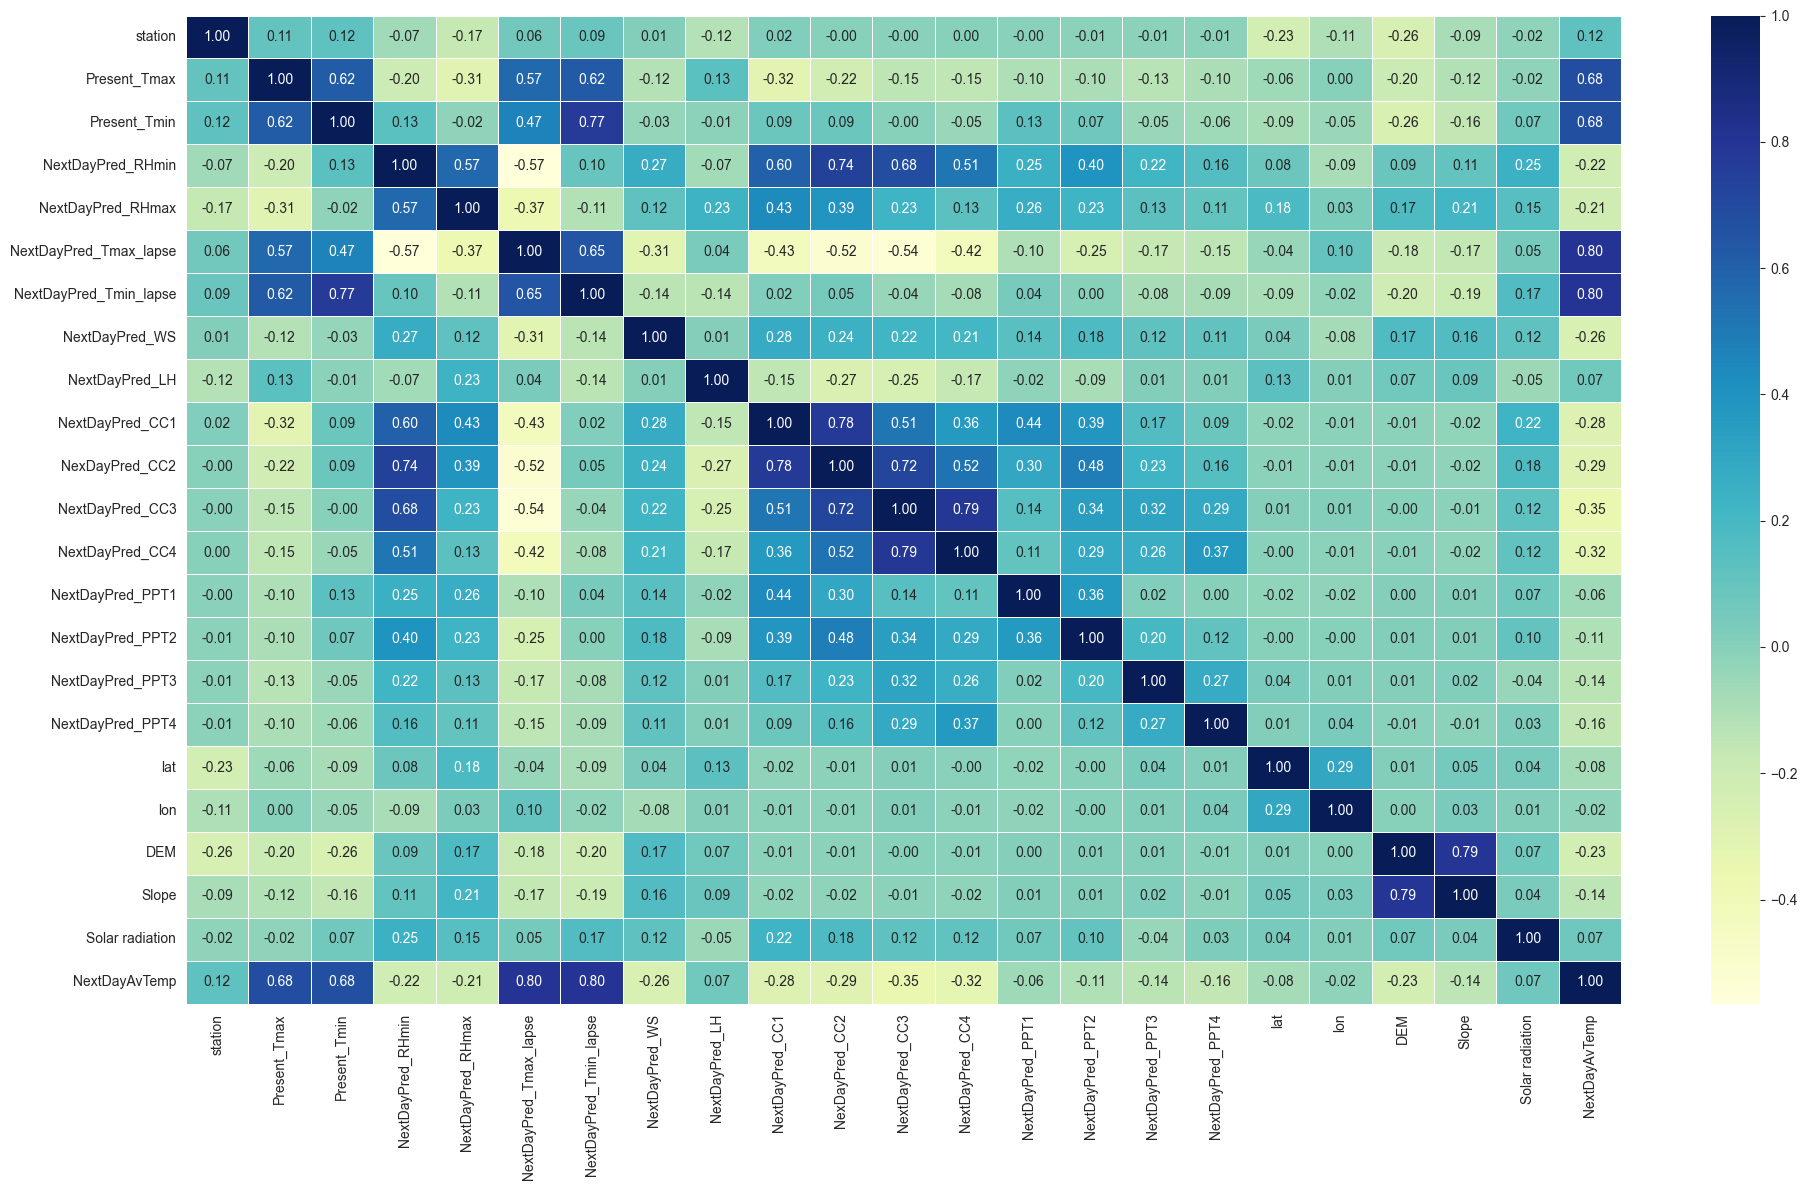

In [27]:
corr_matrix = training_set.corr()
fig,ax = plt.subplots(figsize=(20,12))
ax=sns.heatmap(corr_matrix, annot=True, linewidths=.5, fmt=".2f", cmap="YlGnBu") #vlag #YlGnBu 
plt.tight_layout()

In [28]:
X_train_corr = X_train_corr[X_train_corr >=0.7]
X_train_corr

,station,Present_Tmax,Present_Tmin,NextDayPred_RHmin,NextDayPred_RHmax,NextDayPred_Tmax_lapse,NextDayPred_Tmin_lapse,NextDayPred_WS,NextDayPred_LH,NextDayPred_CC1,...,NextDayPred_CC4,NextDayPred_PPT1,NextDayPred_PPT2,NextDayPred_PPT3,NextDayPred_PPT4,lat,lon,DEM,Slope,Solar radiation
station,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Present_Tmax,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Present_Tmin,NaN,NaN,1.000000,NaN,NaN,NaN,0.772141,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NextDayPred_RHmin,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NextDayPred_RHmax,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NextDayPred_Tmax_lapse,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NextDayPred_Tmin_lapse,NaN,NaN,0.772141,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NextDayPred_WS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NextDayPred_LH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NextDayPred_CC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Correlation with the dependent variable 'NextDayAvTemp'
corr_with_next_day_av_temp = training_set.corr()['NextDayAvTemp'].sort_values(ascending=False)

# Display features with absolute correlation above 0.5 with NextDayAvTemp
highly_correlated_features = corr_with_next_day_av_temp[abs(corr_with_next_day_av_temp) > 0.5]

# Display features with absolute correlation below 0.5 with NextDayAvTemp
lowly_correlated_features = corr_with_next_day_av_temp[abs(corr_with_next_day_av_temp) < 0.5]

highly_correlated_features

NextDayAvTemp             1.000000
NextDayPred_Tmax_lapse    0.803880
NextDayPred_Tmin_lapse    0.801034
Present_Tmax              0.684555
Present_Tmin              0.681259
Name: NextDayAvTemp, dtype: float64

In [30]:
correlated_features = ['NextDayPred_Tmax_lapse', 'NextDayPred_Tmin_lapse', 'Present_Tmax', 'Present_Tmin']

In [31]:
lowly_correlated_features

station              0.123440
Solar radiation      0.072796
NextDayPred_LH       0.066675
lon                 -0.017429
NextDayPred_PPT1    -0.061443
lat                 -0.077729
NextDayPred_PPT2    -0.109444
NextDayPred_PPT3    -0.142436
Slope               -0.143846
NextDayPred_PPT4    -0.157673
NextDayPred_RHmax   -0.213186
NextDayPred_RHmin   -0.220835
DEM                 -0.234060
NextDayPred_WS      -0.261636
NextDayPred_CC1     -0.284516
NexDayPred_CC2      -0.290768
NextDayPred_CC4     -0.321806
NextDayPred_CC3     -0.346493
Name: NextDayAvTemp, dtype: float64

Key Insights from Correlation Heatmap:

- The diagram illustrates the correlation between various features and the target variable, named "NextDayAvTemp".
- At the bottom of the diagram, you can see the target variable "NextDayAvTemp" alongside features that are either lowly or highly correlated to it.
- The heatmap is crucial for identifying variables that might lead to multicollinearity, thus affecting the model's integrity.
- Features that are correlated with each other are represented by the same color, as seen in the diagram's last row.
- Variables like NextDayPred_Tmax_lapse, NextDayPred_Tmin_lapse, Present_Tmin, Present_Tmax shows a strong positive correlations with NextDayAvTemp, indicating their importance in predicting next-day temperature.
- Some variables, such as NextDayPred,slope, have a lower correlation with NextDayAvTemp, suggesting they might have less predictive power on their own. However, they could still be valuable in combination with other features or in specific modeling contexts.

##  Looking at distributions of all the features and target variable on the training sets

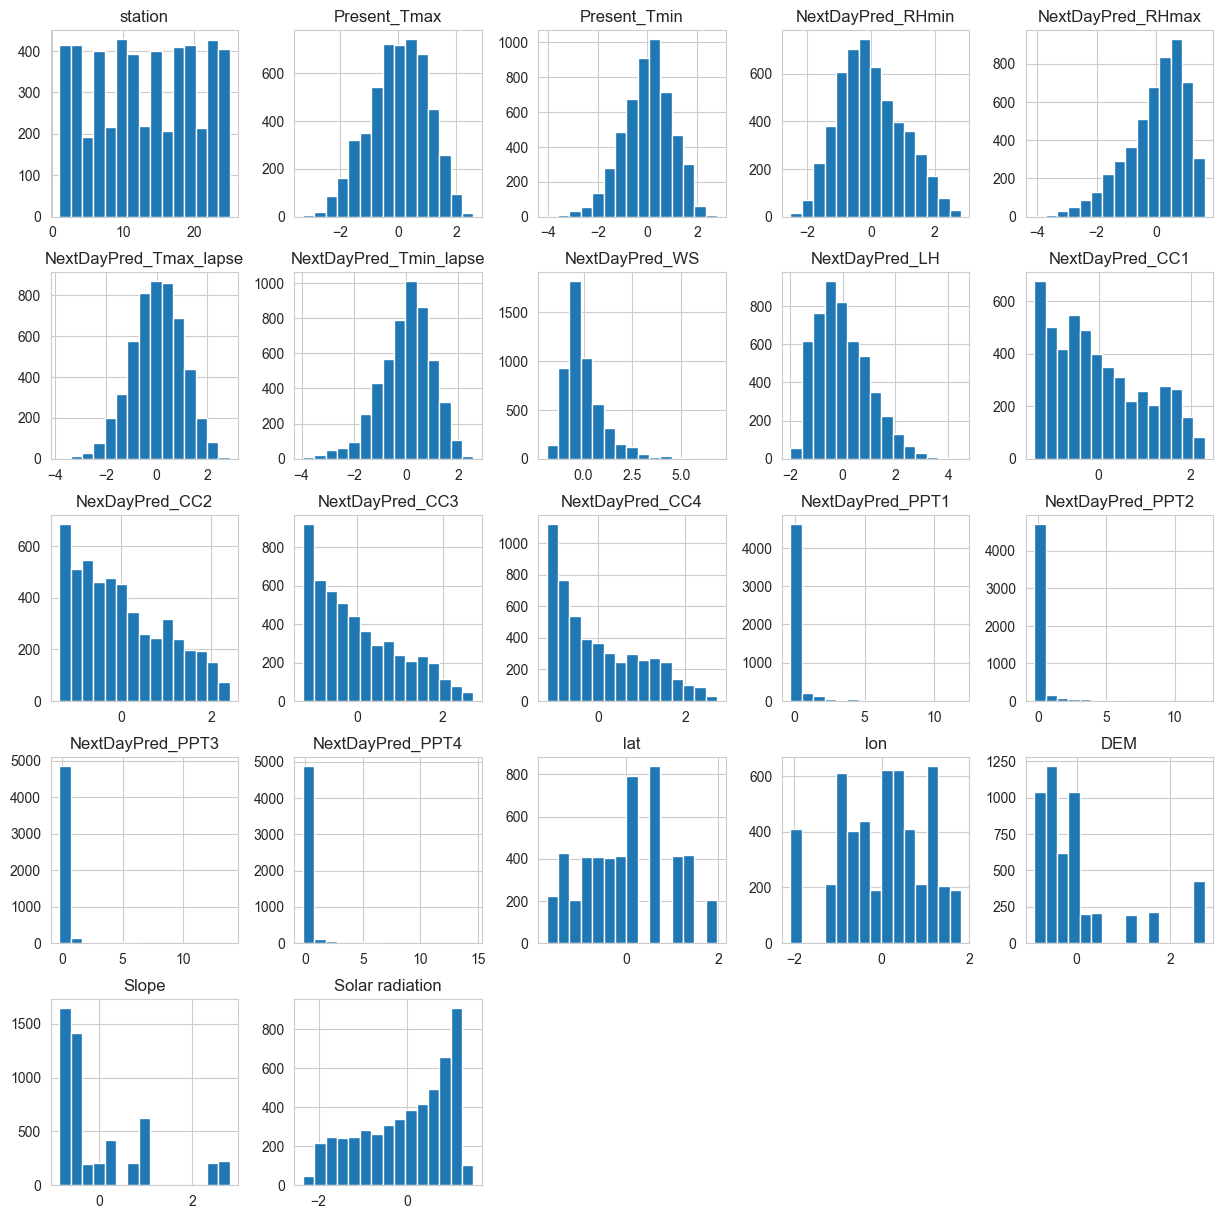

In [32]:
# Check the distribution of all the features
X_train.hist(figsize=(15,15),bins = 15)
plt.title("Features Distribution")
plt.show()

### Looking at distributions of target variable

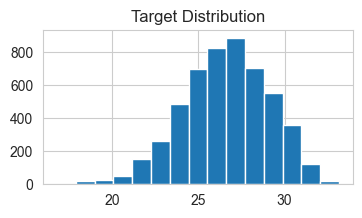

In [33]:
y_train.hist(figsize=(4,2),bins = 15)
plt.title("Target Distribution")
plt.show()

Key Insights from the distributions:

From the above, it can be seen that some features and the target variable are normally distributed while others are not. At the tail end of some bar charts shows that some features and the target variable has outliers

### Looking at distributions of categorical feature

<Axes: xlabel='station'>

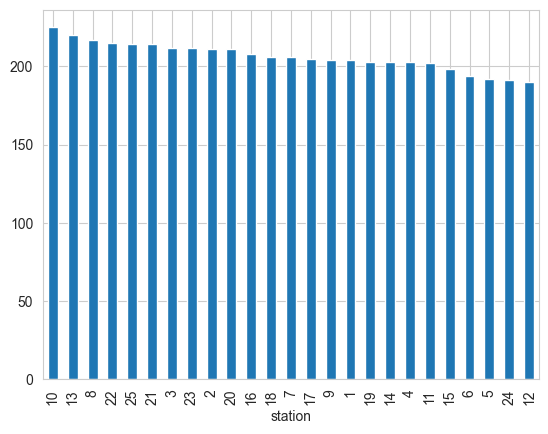

In [34]:
X_train['station'].value_counts().plot(kind='bar')

# Outlier Detection
Outliers are data points that deviate from the pattern of the dataset and can indicate atypical or rare cases.

Outliers in weather data can be indicative of unique cases or anomalies that can deviate significantly from the general pattern, and their presence is something that should be expected.

Here, i will consider identifying and understanding outliers for the features that are highly correlated to the target variable.

<Axes: >

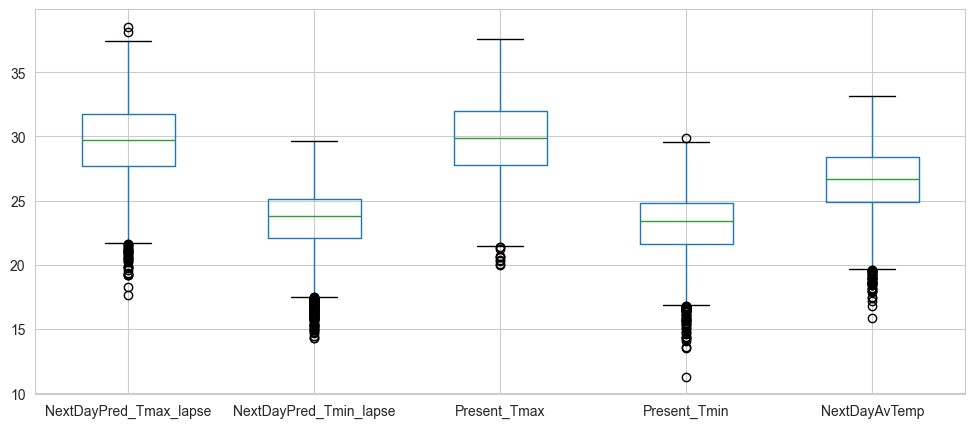

In [35]:
df_cleaned.boxplot(column=['NextDayPred_Tmax_lapse', 'NextDayPred_Tmin_lapse', 'Present_Tmax', 'Present_Tmin', 'NextDayAvTemp'],figsize=(12,5))

Key Insights from Boxplot:

It can be seen that the features that are correlated to the target variable and the target variable itself has outliers. Since this is a dataset concerning weather conditions, having outliers can be indicative of unique cases or anomalies that deviate significantly from the general pattern, and their presence is something to be expected.

# Univariate Analysis for some Features on the training sets

Univariate analysis helps in understanding the distribution and/or characteristics of a single variable, helping me to recognize patterns, summarization, and statistical exploration.
 
- For my univariate and bivariate analysis, i choose to look at features which are highly correlated to my target variable and this makes them directly relevant to the prediction of next-day average temperature

# Univariate Analysis for Numerical Features with high correlation to target variable

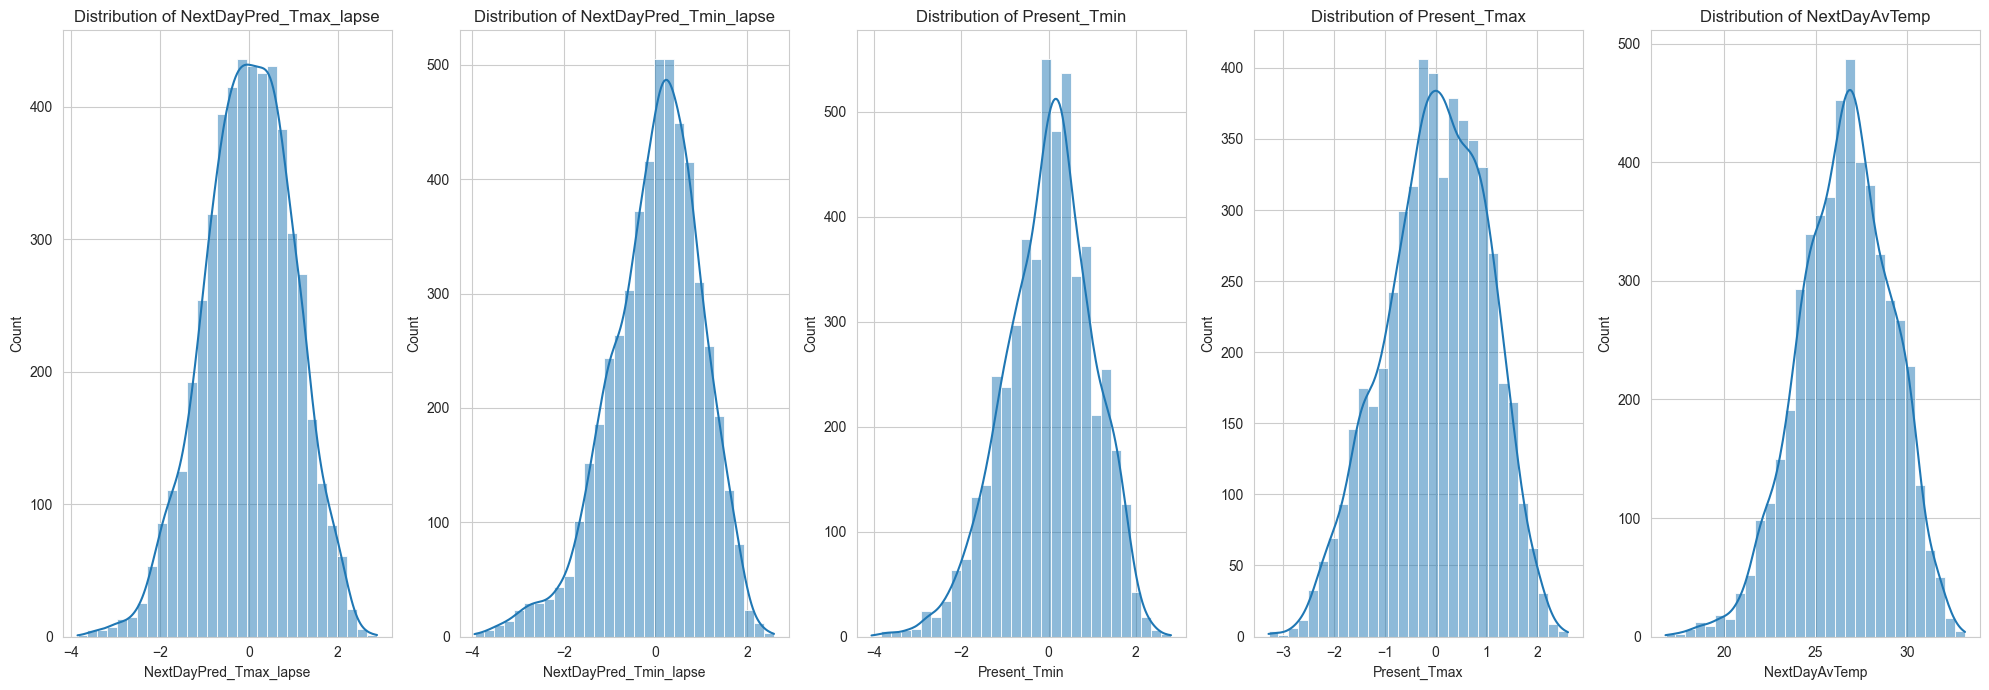

In [36]:
fig, ax = plt.subplots(1, 5, figsize=(20, 7))

sns.histplot(X_train['NextDayPred_Tmax_lapse'], bins=30, ax=ax[0], kde=True)
ax[0].set_title('Distribution of NextDayPred_Tmax_lapse')

sns.histplot(X_train['NextDayPred_Tmin_lapse'], bins=30, ax=ax[1], kde=True)
ax[1].set_title('Distribution of NextDayPred_Tmin_lapse')

sns.histplot(X_train['Present_Tmin'], bins=30, ax=ax[2], kde=True)
ax[2].set_title('Distribution of Present_Tmin')

sns.histplot(X_train['Present_Tmax'], bins=30, ax=ax[3], kde=True)
ax[3].set_title('Distribution of Present_Tmax')

sns.histplot(y_train, bins=30, ax=ax[4], kde=True)
ax[4].set_title('Distribution of NextDayAvTemp')

plt.tight_layout()
plt.show()


Key Insights from Univariate Analysis:

The distributions appears roughly normal with the mean and median closely aligned, indicating a symmetrical spread of data points around the central value. This suggests that there is an equal likelihood of observing data points on either side of the mean. This pattern indicates that the majority of the observations are clustered around the mean, with fewer instances of extreme values in either direction.

# Bivariate/Multivariate Analysis

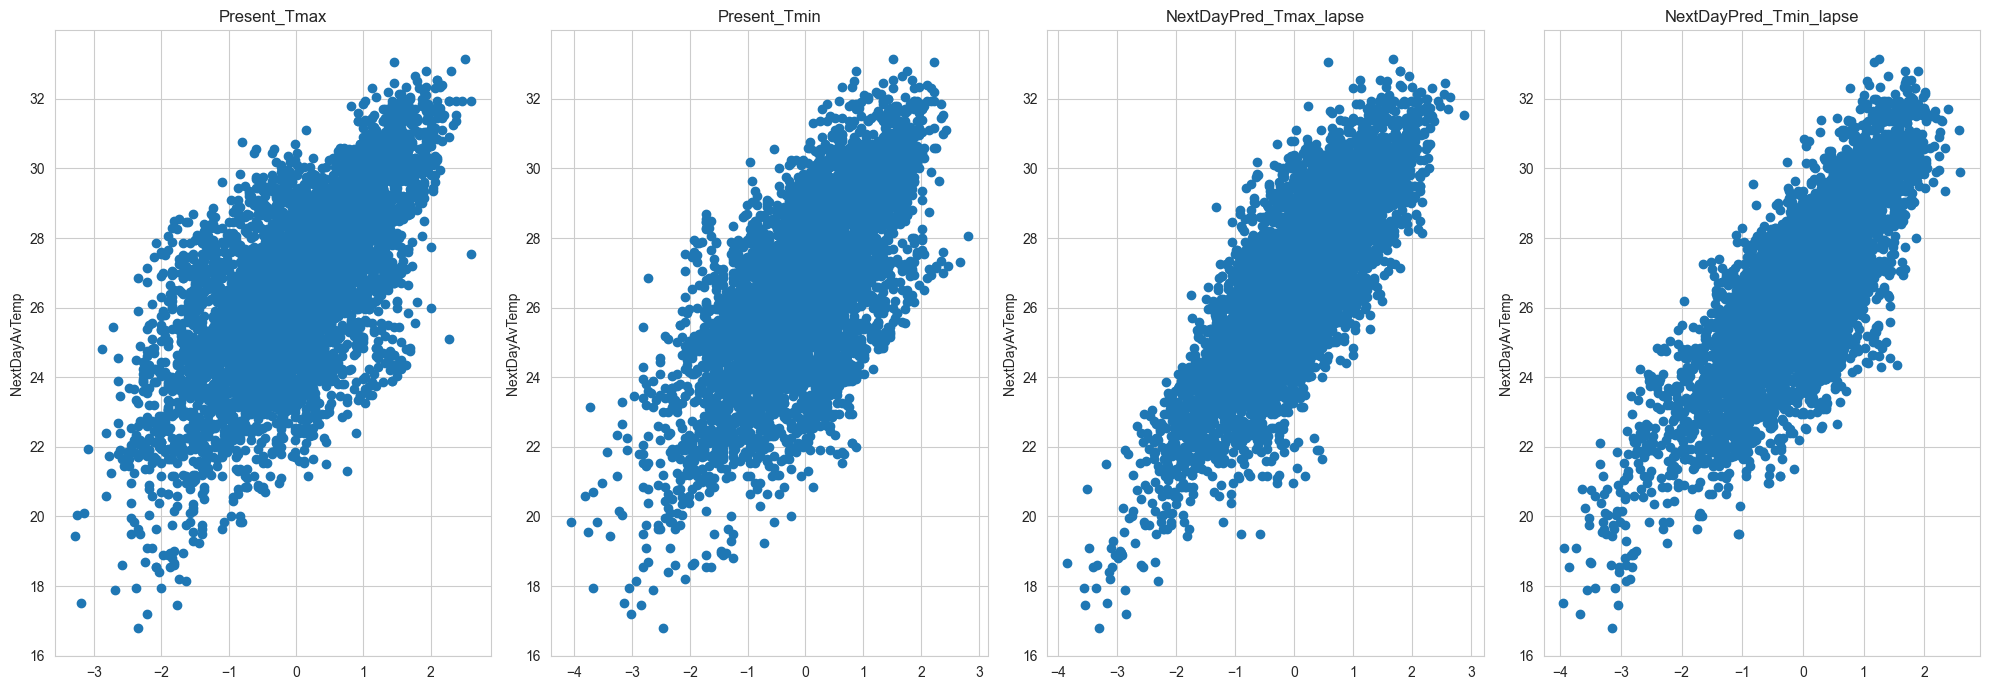

In [37]:
fig,axes = plt.subplots(nrows=1,ncols=4,figsize=(20,7))

axes[0].plot(X_train['Present_Tmax'],y_train,'o')
axes[0].set_ylabel("NextDayAvTemp")
axes[0].set_title("Present_Tmax")

axes[1].plot(X_train['Present_Tmin'],y_train,'o')
axes[1].set_title("Present_Tmin")
axes[1].set_ylabel("NextDayAvTemp")

axes[2].plot(X_train['NextDayPred_Tmax_lapse'],y_train,'o')
axes[2].set_title("NextDayPred_Tmax_lapse");
axes[2].set_ylabel("NextDayAvTemp")

axes[3].plot(X_train['NextDayPred_Tmin_lapse'],y_train,'o')
axes[3].set_title("NextDayPred_Tmin_lapse");
axes[3].set_ylabel("NextDayAvTemp")
plt.tight_layout();

Key Insights from Bivariate Analysis:

‘Present_Tmax’, ‘Present_Tmin’,‘NextDayPred_Tmax_lapse’ and 'NextDayPred_Tmin_lapse' show a good linear relationship with the target variable.

### Preliminary Conclusions and Insights:

1. Exploratory data analysis provides valuable insights into factors influencing next-day average temperature.
2. Key predictors identified are:
   - Present-day maximum temperature
   - Tmin
   - NextDayPred_Tmax_lapse
   - Tmin, all showing positive correlations with next-day temperature, making them suitable for regression analysis.
3. These variables are likely to be key features in developing a regression model for temperature prediction.
4. Features with low correlation, such as NextDayPred_CC1 and NextDayPred_WS, will likely have a minimal impact on temperature prediction.
5. The correlation matrix indicates certain features with low correlation that will not strongly impact temperature prediction.
6. The presence of multicollinearity, as suggested by the heatmap, requires careful consideration during feature selection to avoid model instability.
7. Given the number of predictors in the dataset, feature selection becomes crucial to simplify the model, reduce the risk of overfitting, and potentially improve model performance. Techniques such as backward elimination could be employed to identify significant predictors.


# Assignment II


Selecting a machine learning model for a regression problem involves understanding the nature of your problem, the type of data you have. Given that my objective is to predict a numerical value (temperature), this classifies as a regression problem.

The Scikit-Learn machine learning algorithm cheat-sheet is a fantastic resource that helped navigate through the algorithms available in the library. It helps in narrowing down the choices based on the type of problem you're solving. Link below:

**https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html**

For a regression problem like predicting temperatures, the cheat-sheet guides you towards several suitable models. Considering i am working with labeled data to predict a numeric value, models like Linear Regression, Random Forest Regression, and Support Vector Machines (SVM) for regression are viable options. Here's why each might be considered:

### Linear Regression
- **When to Use**: It's a good starting point for regression tasks. Linear regression is straightforward to understand and implement, making it perfect for simple to moderately complex datasets.

### Random Forest Regression
- **When to Use**: When your data involves complex relationships that linear models can't capture. Random forests are versatile and can handle linear and non-linear data without extensive data preprocessing.


### Support Vector Machines (SVM) for Regression (SVR)
- **When to Use**: When your data has a complex distribution, and you need a model that can capture both linear and non-linear relationships. SVM can be particularly powerful with the right kernel choice.


### Using Sklearn's default parameters and features
### 1. Linear Regression model

In [206]:
np.random.seed(0)
# Creating a Linear Regression model
LinearRegression_model = LinearRegression()

# Training the model with the dataset
LinearRegression_model.fit(X_train, y_train)

# Making predictions
y_pred = LinearRegression_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 1.0569120272851455
R^2 Score: 0.8372524682529013


### 2.RandomForestRegressor

In [207]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
np.random.seed(0)

# Creating the Random Forest model
RandomForestRegressor_model = RandomForestRegressor(n_estimators=180, random_state=0)  # You can adjust the number of trees

# Training the model
RandomForestRegressor_model.fit(X_train, y_train)

# Making predictions
y_pred = RandomForestRegressor_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.5626118151856632
R^2 Score: 0.9133667875003579


### 3.SVR Model

In [203]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(0)
# Creating an SVR model within a pipeline that also includes scaling
SVR_model = make_pipeline(StandardScaler(),SVR(C=1.0, epsilon=0.2))

# Training the model
SVR_model.fit(X_train, y_train)

# Making predictions
y_pred = SVR_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.6905157452784286
R^2 Score: 0.8936716299224652


### GradientBoostingRegressor

In [204]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
np.random.seed(0)

# Creating the Random Forest model
GradientBoostingRegressor_model =GradientBoostingRegressor(n_estimators=180, random_state=0)  # You can adjust the number of trees

# Training the model
GradientBoostingRegressor_model.fit(X_train, y_train)

# Making predictions
y_pred = GradientBoostingRegressor_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.6083559505231181
R^2 Score: 0.9063229229914082



1. **Linear Regression** has an MSE of 1.0569120272851455 and an R^2 score of 0.8372524682529013. The model explains about 83.73% of the variance in the dependent variable, indicating a strong linear relationship.

2. **Random Forest** show an improvement over linear regression with an MSE of 0.5640742674418597 and an R^2 score of 0.9131415932657864. The lower MSE indicates better predictive accuracy while the higher R^2 score signifies that the decision tree model explains approximately 91.31% of the variance, making it a more effective model for this dataset.

3. **Support Vector Machines (SVMs)** present an MSE of 0.6905157452784286 and an R^2 score of 0.8936716299224652. While the MSE is higher than that of linear regressor, it's still lower than that of random forest, indicating relatively high predictive accuracy. The R^2 score suggests that SVMs explain around 89.37% of the variance.
4. **Gradient Boosting Regressor**: With an MSE: 0.6083559505231181 and R^2 Score: 0.9063229229914082, he Gradient Boosting Regressor finds a middle ground in performance, with its MSE being lower than that of the linear regression. Its R^2 score is about 90.63% of the variance.

These results were obtained without any hyperparameter tuning or feature selection, meaning that the models were used with their default settings. Hyperparameter tuning and feature selection are critical steps in machine learning that can significantly improve a model's performance. 

Given that these models show substantial predictive capabilities even without optimization, it's good that with proper hyperparameter tuning and feature selection, their performance could be enhanced further. 

|### Adjusting parameters and feature selectioon
For this problem i will be employing SelectKBest and Recursive Feature Elimination (RFE) to enhance my models performance through efficient feature selection:

### SelectKBest
- **Simplifies Models**: This model quickly identifies the most impactful features based on statistical tests, reducing complexity and improving model focus on relevant data.

### Recursive Feature Elimination (RFE)
- **Optimizes Feature Set**: This method include only the most significant features, improving model accuracy by considering the collective influence of features.

These methods streamline the model-building process, ensuring that only the most informative features are used, leading to more accurate and efficient models.

### Feature selection methods
### SelectKBest Feature selection with Linear regression

In [42]:
#Applying SelectKBest to extract the top 10 features
selector = SelectKBest(f_regression, k=10)
X_train_best = selector.fit_transform(X_train, y_train)
X_test_best = selector.transform(X_test)

np.random.seed(0)
# Creating a Linear Regression model
model = LinearRegression()

# Training the model with the dataset
model.fit(X_train_best, y_train)

# Making predictions
y_pred = model.predict(X_test_best)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 1.1526466961844588
R^2 Score: 0.8225108618904396


### SelectKBest Feature selection with Random Forest model

In [43]:
np.random.seed(0)
#Applying SelectKBest to extract the top 10 features
selector = SelectKBest(f_regression, k=10)
X_train_best = selector.fit_transform(X_train, y_train)
X_test_best = selector.transform(X_test)

# Creating the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=0)  # You can adjust the number of trees

# Training the model
model.fit(X_train_best, y_train)

# Making predictions
y_pred = model.predict(X_test_best)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.6345304352713173
R^2 Score: 0.9022924713761837


### SelectKBest Feature selection with SVM

In [44]:
#Applying SelectKBest to extract the top 7 features
selector = SelectKBest(f_regression, k=7)
X_train_best = selector.fit_transform(X_train, y_train)
X_test_best = selector.transform(X_test)

np.random.seed(0)
# Creating an SVR model within a pipeline that also includes scaling
model = make_pipeline(StandardScaler(),SVR(C=1.0, epsilon=0.2))

# Training the model
model.fit(X_train_best, y_train)


# Making predictions
y_pred = model.predict(X_test_best)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.941817680079174
R^2 Score: 0.8549751551390843


### 2nd Feature selection method: Recursive Feature Elimination
#### Recursive Feature Elimination method with linear regression

In [45]:
# Import Recursive Feature Elimination method
from sklearn.feature_selection import RFE
# Import linear Regression method
from sklearn.linear_model import LinearRegression

linReg = LinearRegression()
rfe = RFE(estimator = linReg, n_features_to_select = 10, step = 1) 
X_train_best = rfe.fit_transform(X_train, y_train)
X_test_best = rfe.transform(X_test)

np.random.seed(0)
# Creating a Linear Regression model
model = LinearRegression()

# Training the model with the dataset
model.fit(X_train_best, y_train)

# Making predictions
y_pred = model.predict(X_test_best)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 1.0934941713836968
R^2 Score: 0.8316194037173894


### Recursive Feature Elimination method with Random forest

In [46]:
# Import Recursive Feature Elimination method
from sklearn.feature_selection import RFE
# Import linear Regression method
from sklearn.linear_model import LinearRegression

linReg = LinearRegression()
rfe = RFE(estimator=linReg, n_features_to_select=10, step=1)
X_train_best = rfe.fit_transform(X_train, y_train)
X_test_best = rfe.transform(X_test)

# Creating the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=0)  # You can adjust the number of trees

# Training the model
model.fit(X_train_best, y_train)

# Making predictions
y_pred = model.predict(X_test_best)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.6394374292635647
R^2 Score: 0.9015368728590702


### Preliminary conclusions and ideas to further improve my models
After applying default sklearn parameters and feature selection techniques like SelectKBest and Recursive Feature Elimination (RFE) to predict the next-day average temperature in Seoul here are the preliminary conclusions

### Preliminary Conclusions
- **Feature Selection Impact and model performance**: Both SelectKBest and RFE actually did not improve my models performance in respect to R2 scores.
- **Overfitting and Underfitting**: Without hyperparameter tuning, there's a risk that some models might overfit or underfit the data. 

### Ideas for Further Improvement
- **Hyperparameter Tuning**: Use GridSearchCV or RandomizedSearchCV to find optimal model settings, boosting performance.
- **Cross-Validation**: Apply k-fold cross-validation to ensure model reliability and generalization capability.
- **Feature Engineering**: Develop or modify features to reveal hidden data patterns for more accurate predictions.

### Improve my models performance
From the default models tested, it can be seen that Random forest model has the highest R2 score. For this reason i will be going with this model and optimizing it to achieve the best results.



### Hyper-parameter tuning and cross validation
First i will be finding the best parameters and performing cross validation with the RandomizedSearchcv method. 
The **RandomizedSearchCv** is a method helps simplifies the process of finding the best parameters and evaluating each combination of parameters using cross-validation to determine which set gives the best performance according to a specified metric

In [137]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Smaller, focused parameter grid
param_distributions = {'n_estimators': [150],'learning_rate': [0.01, 0.05, 0.1, 0.2],'max_depth': [5],'min_samples_split': [2],'min_samples_leaf': [1]}

# Initialize and run randomized search
# Set n_iter to a reasonable number based on computational budget
# Set n_jobs to -1 to use all available cores
random_search = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=0),param_distributions=param_distributions, n_iter=4, n_jobs=-1, random_state=0
)
random_search.fit(X_train, y_train)

# Use the best estimator to make predictions
y_pred = random_search.best_estimator_.predict(X_test)

# Evaluate the model
print(f"Best parameters found: {random_search.best_params_}")
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R^2 Score: {r2_score(y_test, y_pred)}')

Best parameters found: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.2}
Mean Squared Error: 0.4197443980018509
R^2 Score: 0.9353660825348494


### Final model after adjusted with the results from the RandomizedSearch

In [184]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Best parameters found from GridSearch
best_params = {'n_estimators': 150,'learning_rate': 0.2,'max_depth': 5,'min_samples_split': 2,'min_samples_leaf': 1}

# Initialize the Gradient Boosting Regressor with the best parameters
model = GradientBoostingRegressor(**best_params, random_state=0)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test) #X_test

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

r3 = model.score(X_train, y_train)

print(f"Training score: {r3}")
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Training score: 0.9866766118175566
Mean Squared Error: 0.4197443980018509
R^2 Score: 0.9353660825348494


### Learning curves for the various models
### LinearRegression

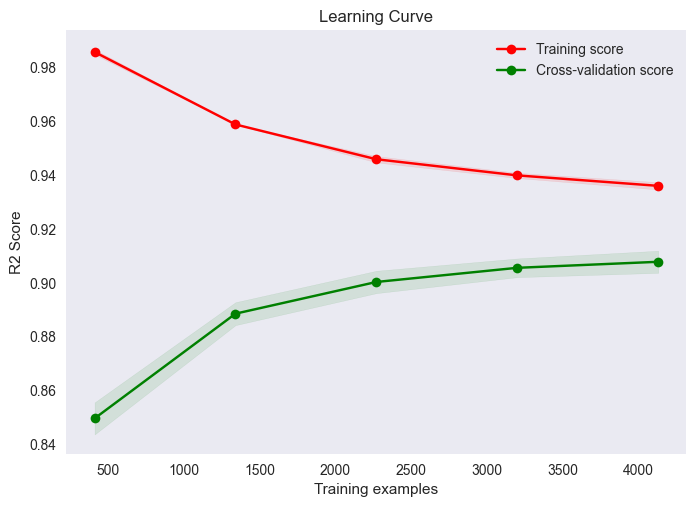

In [205]:
from sklearn.model_selection import cross_val_score, learning_curve
# Plot learning curves
train_sizes, train_scores, test_scores = learning_curve(LinearRegression_model, X_train, y_train, cv=5, n_jobs=4)
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("R2 Score")
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, np.mean(train_scores, axis=1) - np.std(train_scores, axis=1),
                 np.mean(train_scores, axis=1) + np.std(train_scores, axis=1), alpha=0.1, color="r")
plt.fill_between(train_sizes, np.mean(test_scores, axis=1) - np.std(test_scores, axis=1),
                 np.mean(test_scores, axis=1) + np.std(test_scores, axis=1), alpha=0.1, color="g")
plt.legend(loc="best")
plt.grid()
plt.show()

### RandomForestRegressor_model

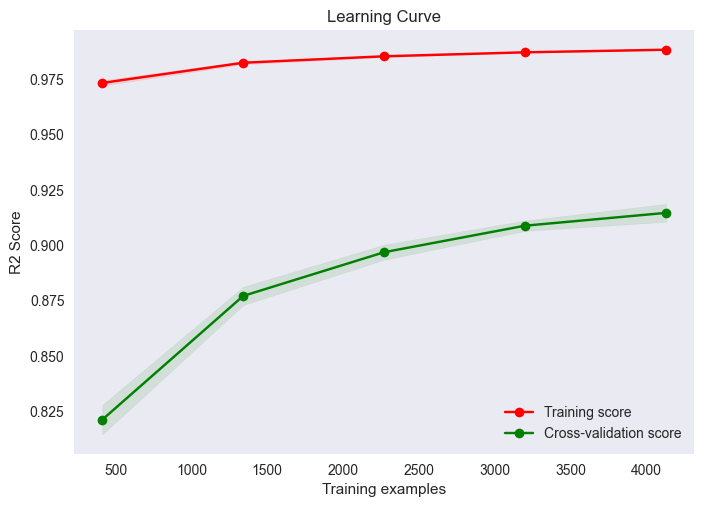

In [208]:
from sklearn.model_selection import cross_val_score, learning_curve
# Plot learning curves
train_sizes, train_scores, test_scores = learning_curve(RandomForestRegressor_model, X_train, y_train, cv=5, n_jobs=4)
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("R2 Score")
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, np.mean(train_scores, axis=1) - np.std(train_scores, axis=1),
                 np.mean(train_scores, axis=1) + np.std(train_scores, axis=1), alpha=0.1, color="r")
plt.fill_between(train_sizes, np.mean(test_scores, axis=1) - np.std(test_scores, axis=1),
                 np.mean(test_scores, axis=1) + np.std(test_scores, axis=1), alpha=0.1, color="g")
plt.legend(loc="best")
plt.grid()
plt.show()

### SVR_model

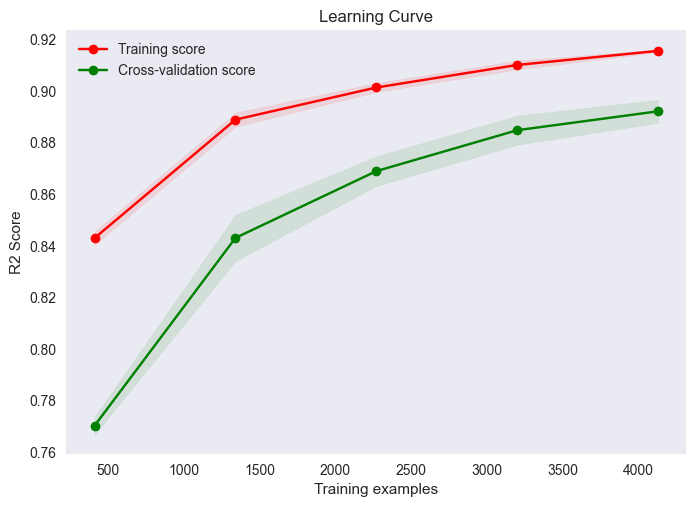

In [209]:
from sklearn.model_selection import cross_val_score, learning_curve
# Plot learning curves
train_sizes, train_scores, test_scores = learning_curve(SVR_model, X_train, y_train, cv=5, n_jobs=4)
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("R2 Score")
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, np.mean(train_scores, axis=1) - np.std(train_scores, axis=1),
                 np.mean(train_scores, axis=1) + np.std(train_scores, axis=1), alpha=0.1, color="r")
plt.fill_between(train_sizes, np.mean(test_scores, axis=1) - np.std(test_scores, axis=1),
                 np.mean(test_scores, axis=1) + np.std(test_scores, axis=1), alpha=0.1, color="g")
plt.legend(loc="best")
plt.grid()
plt.show()

### Cross validation and LearningCurve of Final model(GradientBoostingRegressor)

CV Average R^2 score: 0.9382039881743399
MSE: 0.4197443980018509
R^2 Score: 0.9353660825348494


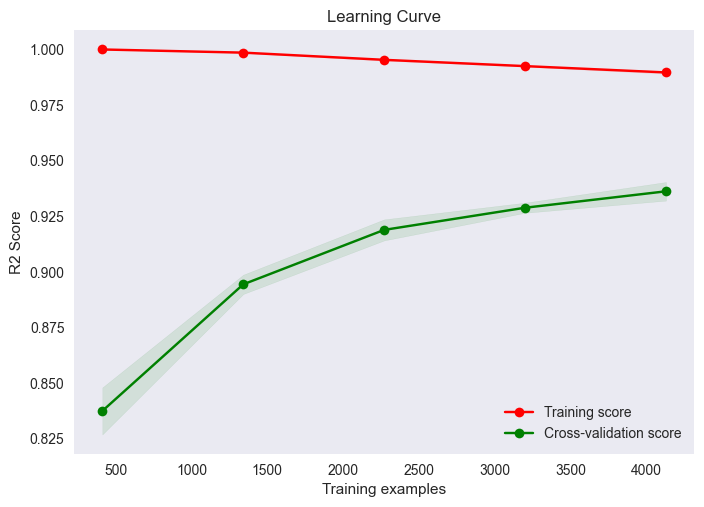

In [158]:
from sklearn.model_selection import cross_val_score, learning_curve
# Cross-validation and model evaluation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f'CV Average R^2 score: {np.mean(cv_scores)}')
print(f'MSE: {mean_squared_error(y_test, model.predict(X_test))}')
print(f'R^2 Score: {model.score(X_test, y_test)}')

# Plot learning curves
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, n_jobs=4)
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("R2 Score")
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, np.mean(train_scores, axis=1) - np.std(train_scores, axis=1),
                 np.mean(train_scores, axis=1) + np.std(train_scores, axis=1), alpha=0.1, color="r")
plt.fill_between(train_sizes, np.mean(test_scores, axis=1) - np.std(test_scores, axis=1),
                 np.mean(test_scores, axis=1) + np.std(test_scores, axis=1), alpha=0.1, color="g")
plt.legend(loc="best")
plt.grid()
plt.show()

The graph represents how the score of the model (R^2 score) changes as the number of training examples increases. Here are the key observations from this graph:

- **Training Score (Red Line)**: This line starts high and decreases slightly as more training examples are added. It suggests that the model performs very well on a small number(500) of samples but slightly less well as the dataset size increases, which is typical because the model initially overfits to a small dataset.

- **Cross-validation Score (Green Line)**: This line begins at a lower score and improves as more data is added, indicating the model is learning and generalizing better from an increasing amount of data. The cross-validation score is an estimation of how well the model will perform on unseen data.

- **Convergence of Scores**: The two lines are getting closer as more training examples are used but haven't converged yet. This indicates that adding more data may continue to improve the model's performance, especially its generalization on unseen data.

- **Shaded Areas**: The shaded regions around each line represent the variance of the scores. A smaller shaded area would indicate more confidence in the estimated scores. In this graph, the variance appears to be reasonably small for both training and validation, especially for the validation score.


### Conclusion and Suggestions:
- The model is performing quite well, but since the lines haven't converged, there's potential for further improvement by adding more training data.
- Among the four models—Linear Regression, Random Forest, SVM, and Gradient Boosting— the Gradient Boosting model stands out as the most effective. Its learning curve demonstrates a strong ability to generalize, indicated by the high and stable training score alongside a steadily improving cross-validation score. It also has a relatively small gap between these scores suggests a well-balanced model with low bias and variance.